### [Vitaly Kartashov](https://github.com/kartashoffv)


In [2]:
!pip install pandas catboost optuna plotly matplotlib seaborn tqdm scipy nbformat
!pip3 install scikit-learn 

In [1]:
import pandas as pd
data = pd.read_csv('data/cirrhosis.csv')
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## EDA

In [5]:
# general info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
# empty values 
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [2]:
# eliminating gaps in the table -> for categorical data we focus on the mode, for numerical data - on the average

df_num_col = data.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    data[c].fillna(data[c].mean(), inplace=True)

df_cat_col = data.select_dtypes(include=('object')).columns
for c in df_cat_col:
    data[c].fillna(data[c].mode().values[0], inplace=True)    

In [3]:
# вновь посмотрим на таблицу
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

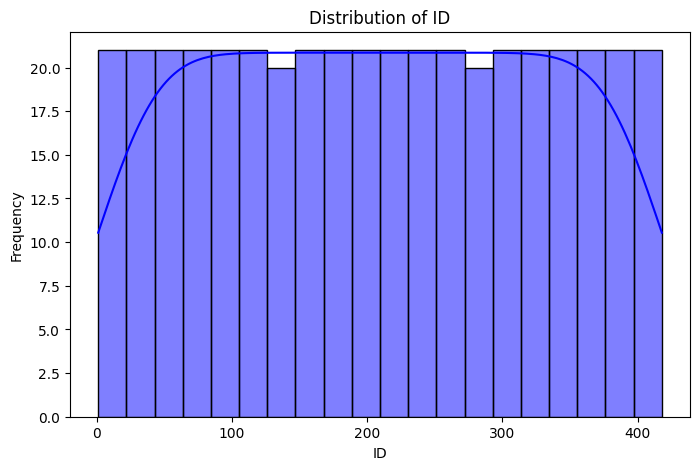

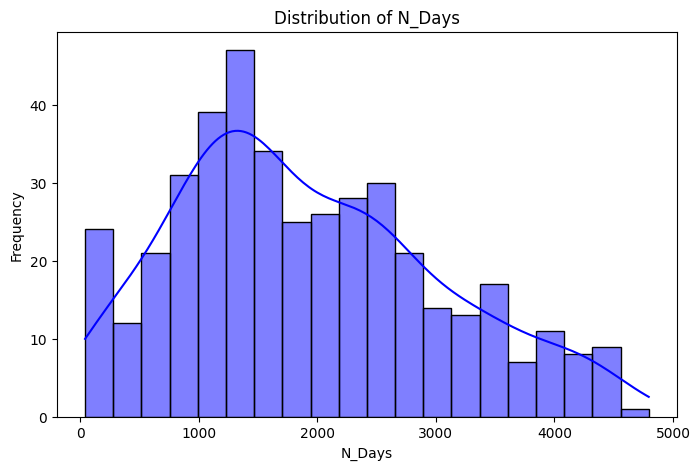

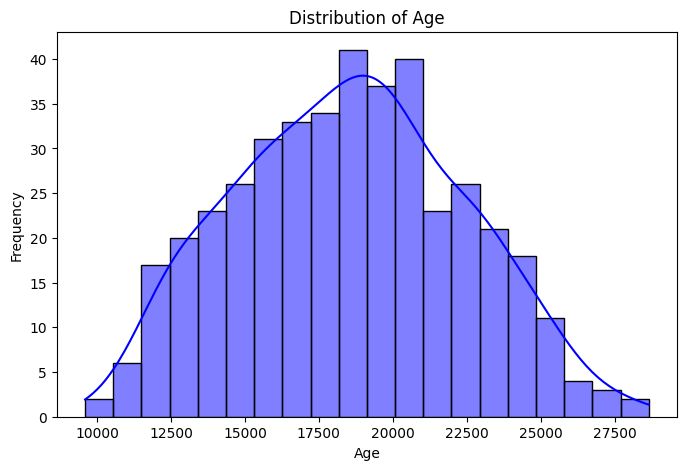

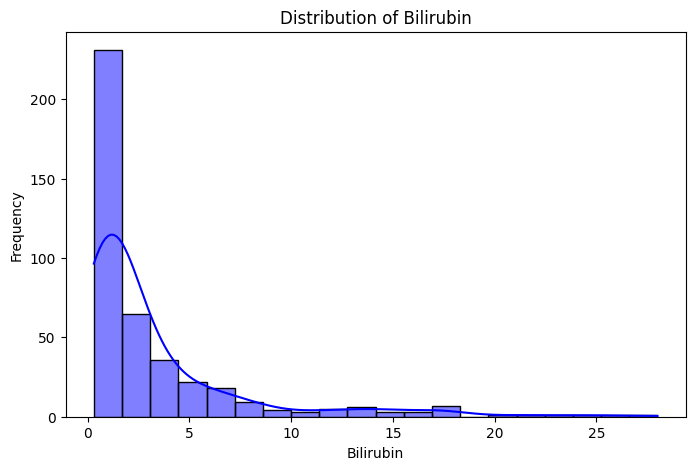

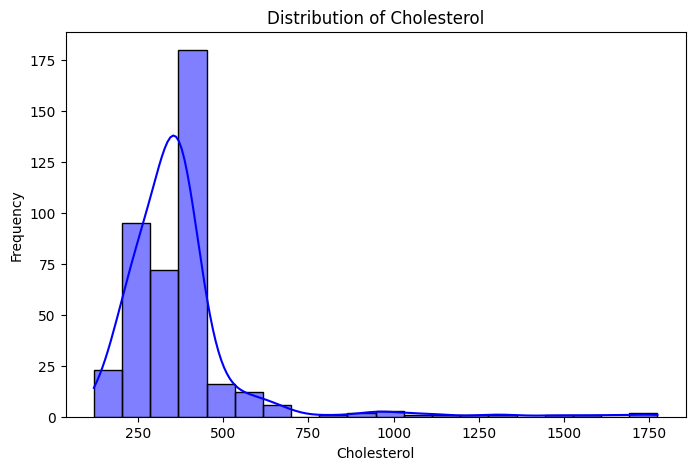

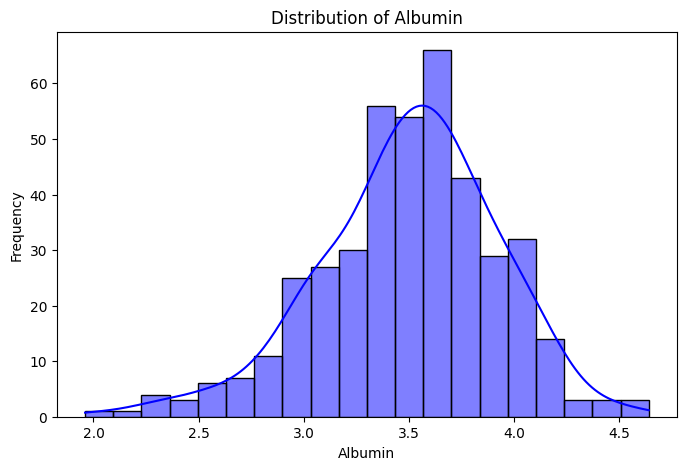

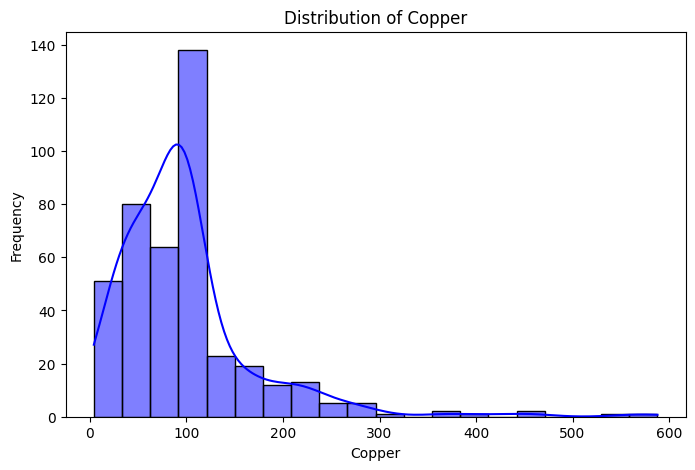

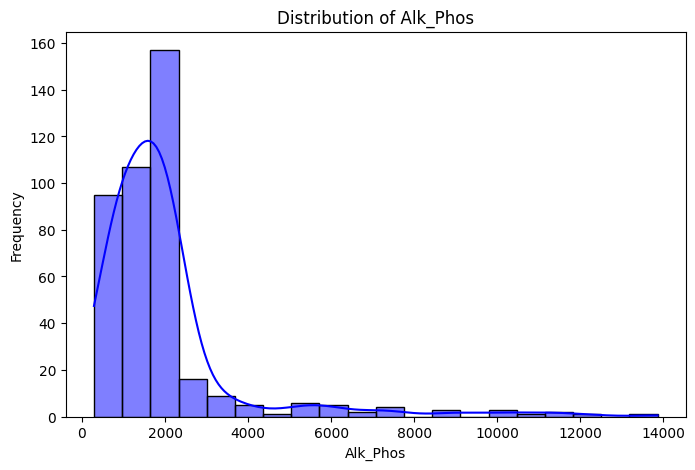

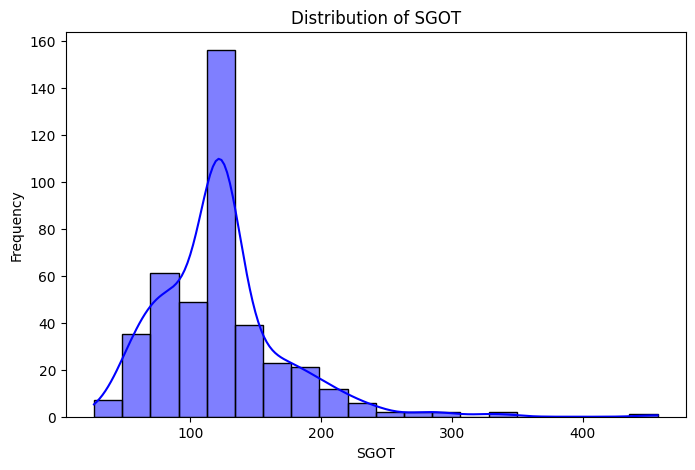

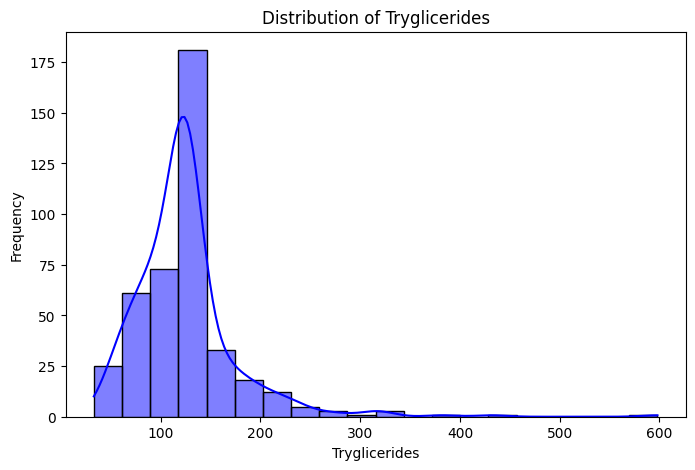

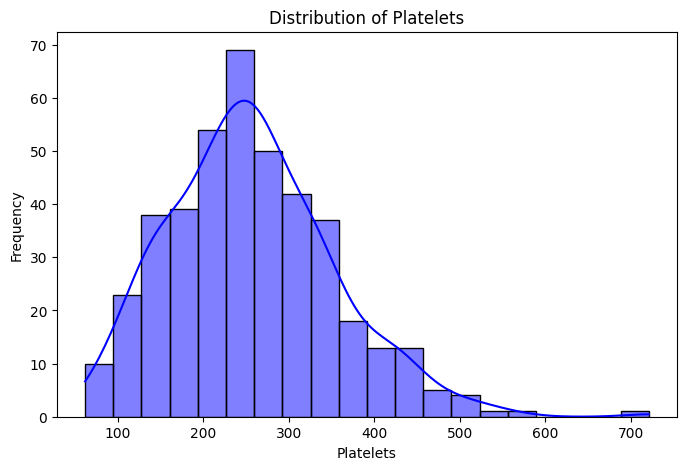

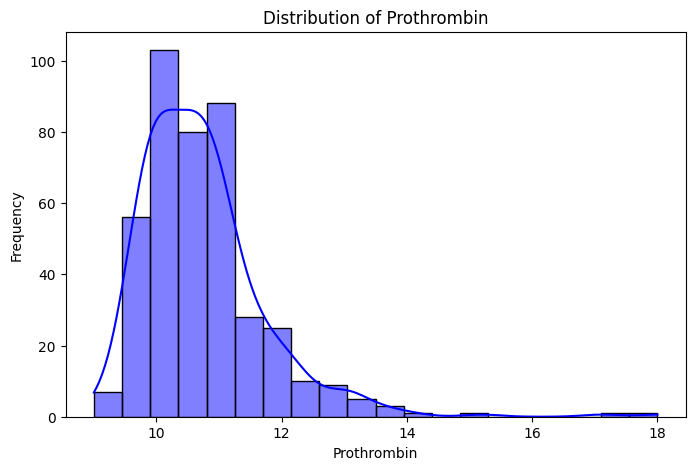

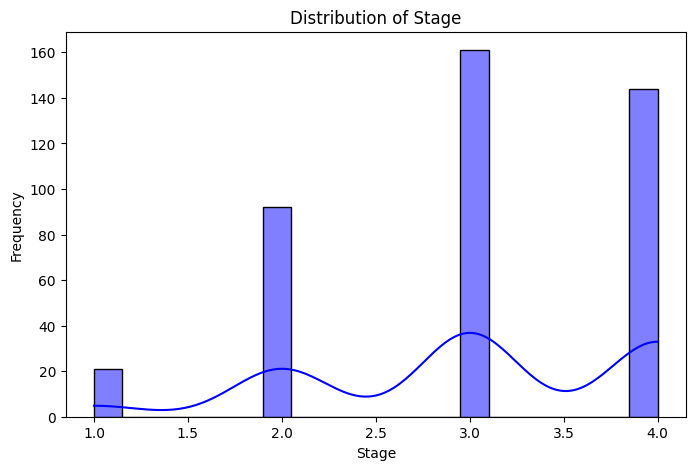

/var/folders/_q/k41wyl5578xcfmt2clgwg93m0000gn/T/ipykernel_70113/616288152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


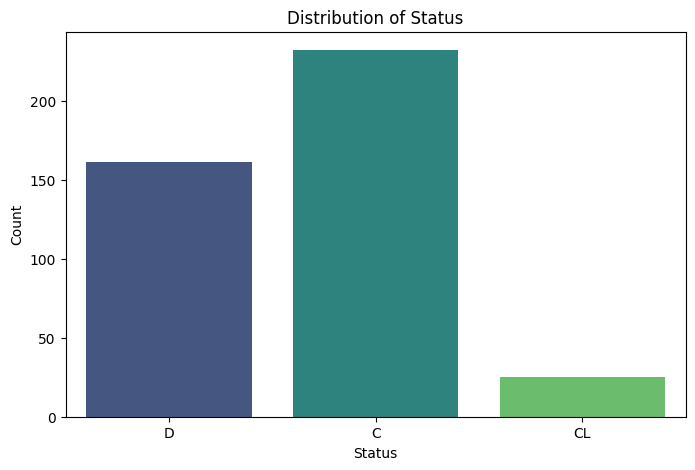

/var/folders/_q/k41wyl5578xcfmt2clgwg93m0000gn/T/ipykernel_70113/616288152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


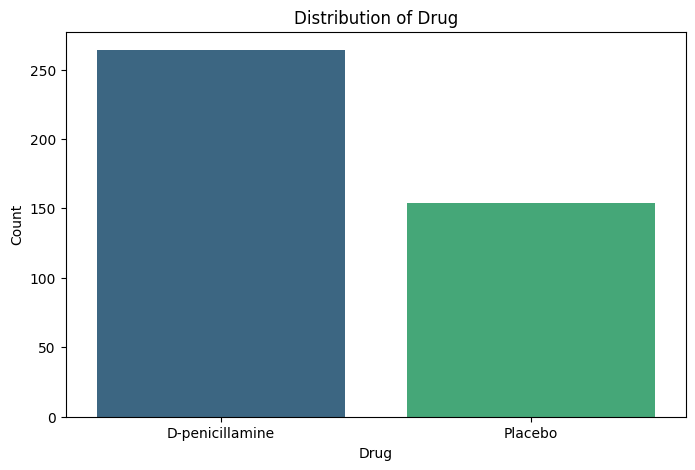

/var/folders/_q/k41wyl5578xcfmt2clgwg93m0000gn/T/ipykernel_70113/616288152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


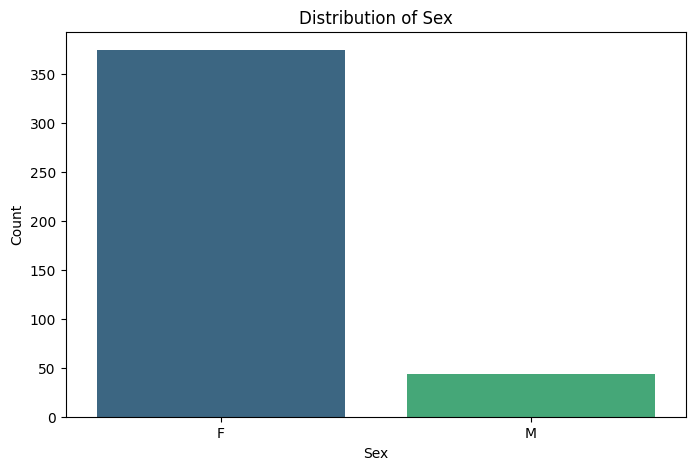

/var/folders/_q/k41wyl5578xcfmt2clgwg93m0000gn/T/ipykernel_70113/616288152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


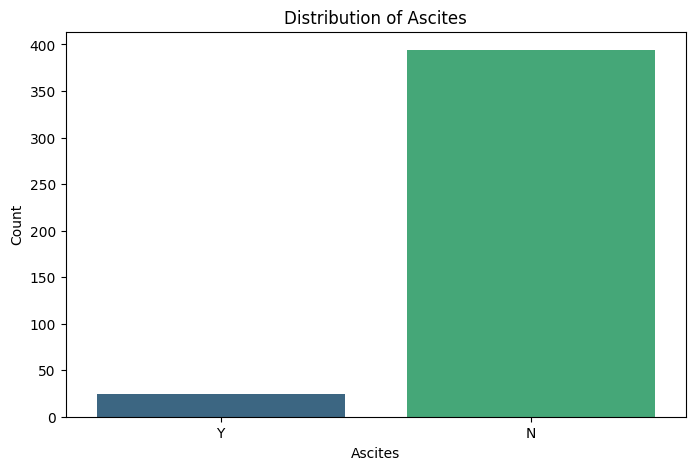

/var/folders/_q/k41wyl5578xcfmt2clgwg93m0000gn/T/ipykernel_70113/616288152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


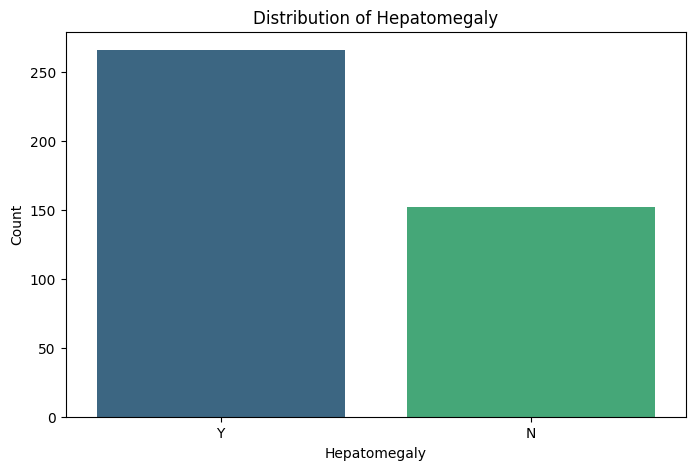

/var/folders/_q/k41wyl5578xcfmt2clgwg93m0000gn/T/ipykernel_70113/616288152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


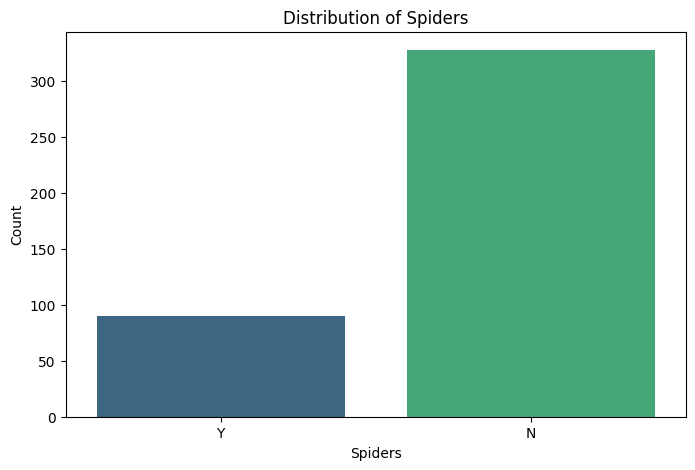

/var/folders/_q/k41wyl5578xcfmt2clgwg93m0000gn/T/ipykernel_70113/616288152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


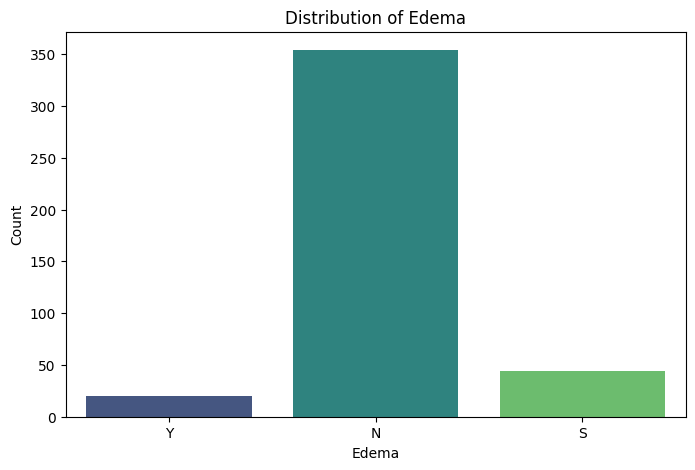

In [4]:
#check data distribution
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = data.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Check distribution for categorical columns (value counts)
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

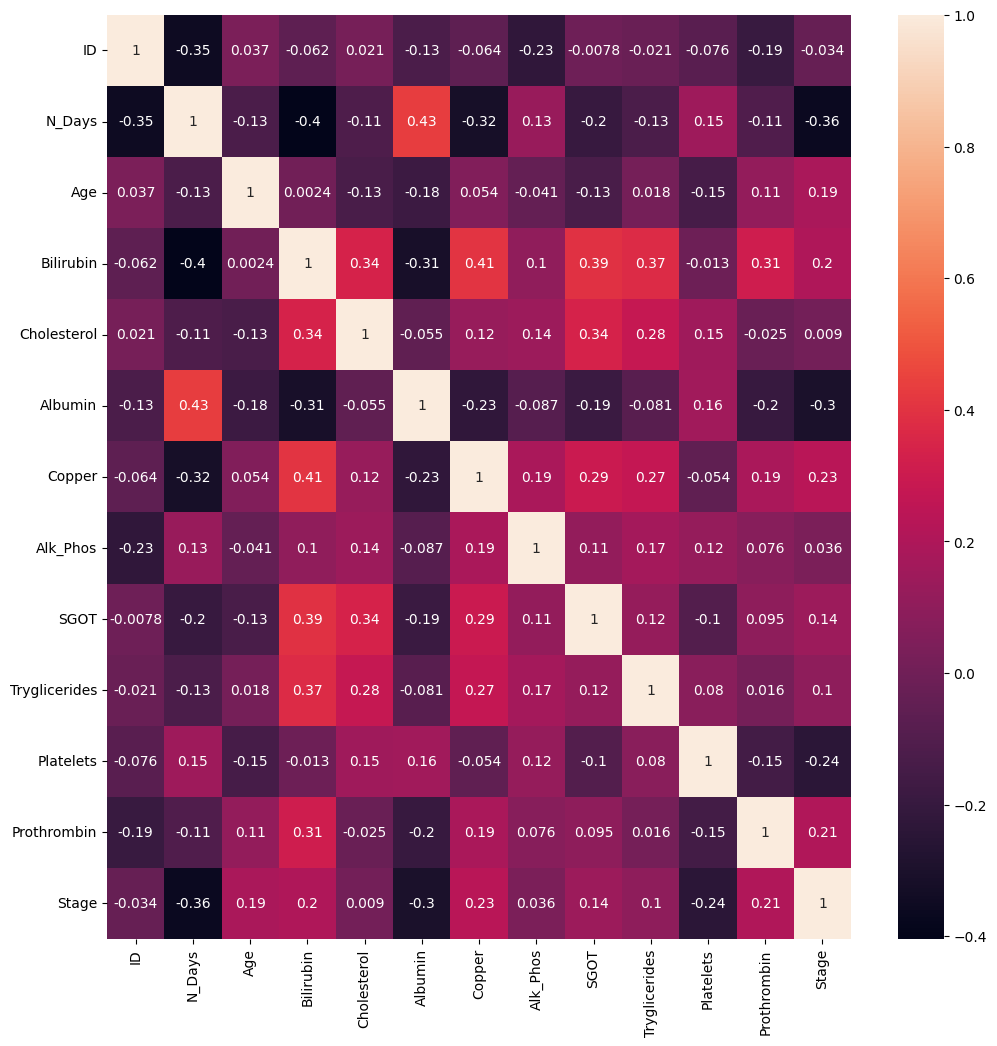

In [5]:
# checking for interdependence of variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))

sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
plt.show()

## Определяем метрики для оценки эффективности модели

In [6]:
import plotly.express as px
import pandas as pd

status_counts = data['Status'].value_counts()

fig = px.bar(
    x=status_counts.index,
    y=status_counts.values,
    labels={'x': 'Status', 'y': 'Count'},
    title='Status Distribution'
)

fig.update_layout(
    height=400,
    width=600,
    bargap=0.6,
)
fig.update_traces(
    text=status_counts.values,
    textposition='outside'
)
fig.update_yaxes(range=[0, max(status_counts.values) + 50])  

fig.show()

Видим явный дисбаланс классов - для более объективной оценки будем использовать f1-меру для задачи мультиклассовой классификации. Помимо ML-метрики в сервисе также будут оцениваться resource requirements (Memory Usage, CPU Usage, Pipeline Execution Time)

## Predictive modeling & Pipeline

Пользователю будет предложено три модели на выбор: Random Forest и Logistic Regression со значениями по умолчанию и CatBoost c подобранными гиперпараметрами (с помощью Optuna). 

Предполагается, что первые две модели идут по меньшим кредитам приложения, при этом дают более низкую точность прогнозирования по сравнению с последней, которая идет за большее количество кредитов, предлагая более высокую точность прогнозирования.

In [8]:
# preprocessing

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Separate features and target variable
data = pd.read_csv('data/cirrhosis.csv')
X = data.drop(['Status', 'ID'], axis=1)
y = data['Status']
le = LabelEncoder()
y = le.fit_transform(y)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# handle empty values for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# handle empty values for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numeric and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Подбор гиперпараметров для CatBoost

In [305]:
import optuna
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def objective(trial):
    catboost_params = {
        'iterations': trial.suggest_int('iterations', 10, 1000),
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_state': 42,
        'verbose': False
    }

    # Define models
    catboost_model = CatBoostClassifier(**catboost_params)

    # Define preprocessing and pipeline for each model
    catboost_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', catboost_model)
    ])

    # Evaluate models using cross-validation
    catboost_score = cross_val_score(catboost_pipeline, X, y, cv=5, scoring='f1_weighted').mean()

    return catboost_score

N_TRIALS = 50

study = optuna.create_study(direction='maximize')
with tqdm(total=N_TRIALS) as pbar:
    def update_progress_bar(study, trial):
        pbar.update(1)

    study.optimize(objective, n_trials=N_TRIALS, callbacks=[update_progress_bar])

print("Best parameters:", study.best_params)

100%|██████████| 50/50 [20:02<00:00, 24.05s/it]

Best parameters: {'iterations': 515, 'depth': 10, 'learning_rate': 0.24180265351139493, 'l2_leaf_reg': 6.857281392013732}


## Pipeline

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder


# Load dataset
data = pd.read_csv('data/cirrhosis.csv')

# Separate features and target variable
X = data.drop(['Status', 'ID'], axis=1)
y = data['Status']
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# handle empty values for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# handle empty values for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numeric and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# part with fit/predict

# models = #set model
# pipeline = Pipeline(steps=[
#             ('preprocessor', preprocessor),
#             ('classifier', model)
#         ])
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

In [332]:
# compare models

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "RandomForest" : RandomForestClassifier(),
    "LogisticRegression" : LogisticRegression(),
    "CatBoost" : CatBoostClassifier(iterations=515, depth=10, learning_rate=0.24180265351139493, l2_leaf_reg=6.857281392013732, verbose=False) #optuna
}


def comparing_models(models : dict):
    
    for model_name, model in models.items():
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)
        # Predictions on the test set
        y_pred = pipeline.predict(X_test)
        # Evaluate the performance of the model
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f"f1_score of {model_name}: {f1}")
        
comparing_models(models)
        

f1_score of RandomForest: 0.7779503105590063
f1_score of LogisticRegression: 0.7664638036457999
f1_score of CatBoost: 0.8015382097856325
